## NEURAL NETWORKS WITH TENSORFLOW

I will be using information and examples based on the TensorFlow 2.0 course provided by the FreeCodeCamp and the TensorFlow documentation [link](https://www.tensorflow.org/tutorials/keras/classification).

In this notebook I will provide information on how to create and use a neural network to classify articles of clothing. To achieve this, I will use a sub module of TensorFlow called **keras**.

**What is Keras?**

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

Use Keras if you need a deep learning library that:
* Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility)
* Supports both convolutional networks and recurrent networks, as well as combinations of the two
* Runs seamlessly on CPU and GPU

With keras we don't have to build neural networks from scratch. It hides a lot of mathematical complexity (that otherwise we would have to implement) inside of helpful packages, modules and methods, thus, making it very easy to work with neural networks.

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

2.1.0


Let's start with some theoritical information before diving into creating a Neural Network:

* What is a Neural Network?
* How does a Neural Network work?
* What is the math involved in Neural Networks?
* What is back propagetion?
* What is gradient descent?
* How information actually flows through the network?

Neural Networks are complex. There are a lot of components that go into them. Here, I will try to write as much theoretical information as possible and explain things part by part before combining everything in the end.

### What are Neural Networks and how do they work

##### what's a neural network?

Let's start simple. The whole point of a neural network is to provide classification or predictions.
We have some input information, we feed that information to the neural network and then we want it to give us some output. As previously mentioned a neural network is a layered representation of data(information), and normally in neural networks we have **multiple layers**. In the core machine learning algorithms (like linear regression) data was not transformed or modified within the model, it simply existed in one layer. We passed some features to our model, some math was done, an answer (label) was returned. The data was not changed or transformed throughout this process.

A neural network processes our data differently. It attempts to represent our data in different ways and in different dimensions by applying specific operations to transform our data at each layer. Another way to express this is that at each layer our data is transformed in order to learn more about it. By performing these transformations, the model can better understand our data and therefore provide a better **prediction**.

##### what's a neural network made of?

The architecture of a Neural Network is as follows:

* Input layer
* Hidden Layer(s)
* Output Layer
* Neurons(nodes)
* Connected Layers 

![Imgur](https://i.imgur.com/3NO9kj6.png) 

As we mentioned earlier each neural network consists of multiple layers. At each layer a different transformation of data occurs. Our initial input data is fed through the layers and eventually arrives at the output layer where we will obtain the result.

**Input layer**

The input layer is the layer that our initial (raw) data is passed to. It is the first layer in our neural network. 

**Hidden Layer(s)**

Hidden Layers exist between the Input Layer and the Output Layer. The reason they are called *hidden* is because they are hidden to us, we cannot observe them. Most neural networks consist of at least one hidden layer but can have an unlimited amount. Typically, the more complex the model the more hidden layers.

**Output Layer**

The output layer is the layer that we will retrive our results from. Once the data has passed through all other layers it will arrive here.

**Neurons**

Each layer is made up of neurons. Neurons are responsible for generating/holding/passing ONE numeric value.
For example, our input layer will have as many neurons as we have input information. Let's say we want to pass an image that is of 3x3 pixels, thats 9 pixels. This means that we would need 9 neurons in our input layer to hold each of these pixels.

This also means that our output layer will have as many neurons as we have output information. The output is a little bit more complicated to understand and will be discussed later.

But what about our **hidden layers**? Well these can have as many neurons as we decide. We'll discuss how we can pick these values later but understand a hidden layer can have any number of neurons.

**Connected Layers**

So how are all these layers connected? Well the neurons in one layer will be connected to neurons in the subsequent layer. However, the neurons can be connected in a variety of different ways.
Take for example the figure above. Each neuron in one layer is connected to every neuron in the next layer. This is called a **dense layer**. There are many other ways of connecting layers but well discuss those as we see them.

### Weights and Biases

#### Weights

Weights are associated with each connection in our neural network. Every pair of connected nodes will have one weight that denotes the strength of the connection between them. These are vital to the inner workings of a neural network and will be tweaked as the neural network is trained. The model will try to determine what these weights should be to achieve the best result. Weights start out at a constant or random value and will change as the network sees training data.

#### Biases

Biases are another important part of neural networks and will also be tweaked as the model is trained. A bias is simply a constant value associated with each layer. It can be thought of as an extra neuron that has no connections. The purpose of a bias is to shift an entire **activation function** by a constant value. This allows a lot more flexibllity when it comes to choosing an activation and training the network. There is one bias for each layer.

I'll discuss **activation functions** in more detail later.

### Types of Data

The type of data a neural network processes varies drastically based on the problem being solved. When we build a neural network, we define what shape and kind of data it can accept. It may sometimes be neccessary to modify our dataset so that it can be passed to our neural network.

Some common types of data a neural network uses are the following:

* Vector Data (2D)
* Timeseries or Sequence (3D)
* Image Data (4D)
* Video Data (5D)

There are of course many different types or data, but these are the main categories.

### A few things about the math involved in Neural Networks

On a lower level neural networks are simply a combination of elementry math operations and some more advanced linear algebra. Each neural network consists of a sequence of layers in which data passes through. These layers are made up on neurons and the neurons of one layer are connected to the next (as previously mentioned). These connections are defined by a weight (some numeric value). Each layer also has a bias, this is simply an extra neuron that has no connections and holds a single numeric value. Data starts at the input layer and is trasnformed as it passes through subsequent layers. The data at each subsequent neuron is defined as the following:

$Y =(\sum_{i=0}^n w_i x_i) + b$

where,

$w$ stands for the weight of each connection to the neuron

$x$ stands for the value of the connected neuron from the previous value

$b$ stands for the bias at each layer (this is a constant)

$n$ is the number of connections

$Y$ is the output of the current neuron

$\sum$ stands for sum

The equation above is called a weighed sum. We will take this weighted sum at each and every neuron as we pass information through the network. Then we will add what's called a bias to this sum. The bias allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

#### Activation Function

The above equation is the not a complete one! We forgot a crucial part, the **activation function**. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network. Our new equation with the addition of an activation function $F(x)$ is seen below:

$Y =F((\sum_{i=0}^n w_i x_i) + b)$

Our network will start with predefined activation functions (they may be different at each layer) but the weights and biases are random. As we train the network by feeding it data it will learn the correct weights and biases and adjust the network accordingly using a technqiue called **backpropagation** (explained later). Once the correct weights and biases have been learned our network will hopefully be able to give us meaningful predictions. We get these predictions by observing the values at our final layer, the output layer. Take a look at the image/figure below:

![Imgur](https://i.imgur.com/14R7Kmp.png)

Activation functions reside within neurons, but not all neurons (as seen in the figure 2 above). Hidden and output layer neurons use activation functions, but input layer neurons do not.
Activation functions perform a transformation on the input received, in order to keep values within a manageable range. Since values in the input layers are generally centered around zero and have already been appropriately scaled, they do not require transformation. However, these values, once multiplied by weights, summed (and once we add the bias at the end as in the equation above) quickly get beyond the range of their original scale, which is where the activation functions come into play, forcing values back within this acceptable range and making them useful.

In order to be useful, activation functions must also be **nonlinear** and **continuously differentiable**. Nonlinearity allows the neural network to be a universal approximation; a continuously differentiable function is necessary for gradient-based optimization methods, which is what allows the efficient back propagation of errors throughout the network and will be discussed in detail below. 

Inside the neuron:

* an activation function is assigned to the neuron or entire layer of neurons
* weighted sum of input values are added up
* the activation function is applied to weighted sum of input values and transformation takes place
* the output to the next layer consists of this transformed value

#### Types of Activation Functions

Theoretically any number of functions could be used as activation functions, as long as they meet the above requirements. However, a small number of functions are most relied upon. Let's see these functions as well as their shapes:

![Imgur](https://i.imgur.com/J2gHgts.png)

**Sigmoid**

The sigmoid function "squashes" values to the range 0 and 1 and it is mainly used for binary classification in the output layer.

**Tanh**

The tanh function "squashes" values to the range -1 and 1. The output values are, therefore, centered around zero and it can be thought of as a scaled, or shifted, sigmoid. This is why it is almost always preferable to the sigmoid function.

**Rectified Linear Unit (ReLU)**

This activation function takes the form of $f(x) = max(0, x)$. Transformation leads positive values to be 1, and negative values to be zero. It is considered to accelerate convergence of gradient descent compared to above functions and it has become the default activation function for hidden layers.

### What is Backpropagation? 

Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process, we need to discuss and understand something called a **cost/loss function**.

#### cost/loss function

So far we know that a neural network holds, transforms and passes information through the layers until it eventually reaches an output layer. The output layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the beginning of training, our network doesn't know anything (remeber, it has random weights and biases)!

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output). This way we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or a bad job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a bad job, our changes may be more drastic.

So, this is where the **cost/loss function** comes in. This function is responsible for determining how well the network did. We pass it the network's output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the network's job to optimize this cost function, trying to make it as low as possible (the lower the value that this function gives us the better).

Here is a list of a few common loss/cost functions:

* Mean Squared Error
* Mean Absolute Error
* Hinge Loss

#### Gradient Descent

Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand so I will stay away from that for now. Let's see the formal definition:
*Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model.*

#### Optimizer

We may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones:

* Gradient Descent
* Stochastic Gradient Descent
* Mini-Batch Gradient Descent
* Momentum
* Nesterov Accelerated Gradient


**NOTE:**

*I will be passing more information and changing things while I learn, so this notebook alongside with all the other notebooks in the tensorflow directory will be continuously updated*. 

## Let's build and train a basic neural network

For more info about coding a NN see [link](https://www.tensorflow.org/tutorials/keras/classification). This is where I got the dataset and coding information from.

### Dataset that will be used here

I will use the MNIST Fashion Dataset. This is a dataset that is included in keras, it includes 60,000 images for training and 10,000 images for validation/testing.

In [3]:
# load the dataset
fashion_mnist = keras.datasets.fashion_mnist

# split data into training and testing
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Let's take a look at the data to see what we are goingto work with:

In [4]:
train_images.shape

(60000, 28, 28)

so, in train_images we have 60000 images of 28x28 pixels (this will be 784 input neurons for each image)

In [5]:
# let's take a look at 1 pixel:
train_images[0,23,23] # 1st image, row 23, column 23

194

The dataset contains grayscale images only (no colour channels). Now, the values at each pixel are between 0 and 255 where 0 is black and 255 is white, the pixel we chose is close to white.

In [6]:
# have a look at the first few training labels:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

**So, what are our labels made of?**

We have an array of integers between 0 and 9. What do these numbers represent?

They represent a specific piece of clothing. Let's create an array of label names to indicate each one of them:

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
              'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Now let's look at what some of these images look like: 

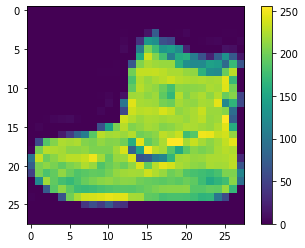

In [8]:
plt.figure()
plt.imshow(train_images[0]) # let's look at the 2nd image of our training dataset
plt.colorbar()
plt.grid(False)
plt.show()

### Data Preprocessing 

The last step before creating the model is to **preprocess** our data. This simply means applying some prior transformations to our data before passing them to the model. 

Here, I will simply scale all our greyscale pixel values (0-255) to be between 0 and 1. This can be done by dividing each value in the training and testing sets by 255.0. 

*Why would we want our input data to be between 0 and 1?*

Typically, it is a good idea to have your input data in between that range. The reason is because when the neural network starts the tarining process, the (random) values of the trainable parameters w and b are in that range. If we pass large input values (0-255 for example) and tiny weights and biases it will be dificult for the network to classify that information because it will need to work harder to update those weights and biases to reduce how large those values are going to be. 

So, the smaller the values we pass to the Network, the easier it is for the Network to process them.

In [9]:
train_images = train_images / 255.0

test_images = test_images / 255.0 # make sure that your testing data comes in the same form as your training data

In [10]:
# take a look at the new values
train_images[34, 13, 13]

0.14901960784313725

### Building the Network

Now it's time to build the model, woohoo! 
I am going to use a **keras sequential** model with three different layers. This model represents a feed-forward neural network (which means that it passes values from left to right). 

I'll break down each layer and its architecture later

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation = 'relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation = 'softmax') # output layer (3)                   
])

print(model)

So let's break down the above code. 

Here I am using the **Sequential method** of keras, which is the most basic form of neural networks. The information here flows sequentially, passing from left to the right (note, in other notebooks I will also play around with recurent and convolutional neural networks). For more information about this method see [link](https://keras.io/models/sequential/). 

After defining the method, we need to define the layers of the model:
* 1st layer: This is the input layer. *What does **flatten** mean here?*

Well, **flatten** allows us to take the input shape (which is defined as 28x28 pixels) and flatten all the pixels into 784. This will result in a single value per input neuron.

* 2nd layer: This is our (first) hidden layer and it is a **dense** layer. This mean that every neuron of that layer will be connected to all the neurons of the previous layer (the input layer). 

This layer consists of 128 neurons. *Why*? I have no idea. This code was taken directly from the tensorflow documentation and they don't axplain why they came up with that number. Anyhow, normally we would not want our hidden layer to have **much** larger number of neurons than the input layer (I think!).

Lastly, we chose the **ReLU** activation function, which gives values of zero when tehry are negative and values of 1 when they positive. Remember, this functions is prefered in the hidden layers.

* 3rd layer: This is our output layer, which is also dense. 

This layer has 10 neurons. *Why?*
Well, our label consists of 10 values representing 10 different types of clothing (can also be called classes). So, the output layer has the predictions of the type of clothing for each image by giving a value (between 0 and 1) for each of the types/classes. **Remember the probability distribution?**

Lastly, the activation function chosen here is **softmax**. The reason is because we are going to have a probability distribution for our 10 classes. Softmax is the function that makes sure all the values in the output neurons add up to 1 and that they are between 0 and 1. For more information about this function check [link](https://www.machinecurve.com/index.php/2020/01/08/how-does-the-softmax-activation-function-work/) 

### Compile the Model

Now that the model is almost ready, we have built the architecture of the model and now, we just need to compile it. This means that we need define the loss function, optimizer and metrics we would like to track.

In [13]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

Let's see what we did above. 

* Optimizer: The algorithm we are using is the **adam** which performs gradient descent (see information in the beginning). 

* loss: Here we use the **sparse_categorical_crossentropy**. *Why?*

Because our **targets** are in categorical format. We have 10 classes, the target-class for each sample is in a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample. 

* metrics: this is the output that we want to see (which is **accuracy** in our case). 

### Training the Model

Now it is time to finally train the model. Since we've already done all the work on our data this step is as easy as calling a single method.

In [14]:
# now just pass the training data, labels and epochs and wait for the magic to happen!
model.fit(train_images, train_labels, epochs = 10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 74us/sample - loss: 0.4995 - accuracy: 0.8238
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3762 - accuracy: 0.8647
Epoch 3/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3375 - accuracy: 0.8778
Epoch 4/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3150 - accuracy: 0.8852
Epoch 5/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2971 - accuracy: 0.8903
Epoch 6/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2824 - accuracy: 0.8945
Epoch 7/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.2711 - accuracy: 0.8991
Epoch 8/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2593 - accuracy: 0.9032
Epoch 9/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.2507 - accuracy: 0.9063
Epoch 10/10
60

Lets start with the accuracy..
We se that during the last epoch our accuracy is 91% but, this is the accuracy on our **training data**. If we want to find out what our true accuracy is, we need to evaluate the model on our testing data.

### Evaluating the Model

Evaluate the model:

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

What does **verbose** mean?
It is simply the amount of information that we are seeing as the model evaluates.. or how much information is printed at the console.
Here we see the loss and test accuracy. 

Now, we see that the test accuracy is less than the training accuracy. 

This is an example of something called **overfitting**. 

Our model seemed to do pretty well on the training data but that is because it would see that data often (10 times in our case). Once we passed new data that it had not seen before its accuracy droped to 88%. This means that we quite overfit our model and it is not good at generalizing for other datasets which is usually the goal. 

When we create a new model we want the highest possible accuracy when training but we also want consistency in the accuracy when evaluating the model with new datasets. We need to make sure that the model generilizes properly. 

### Making predictions with our Model

Making predictions is very easy. We are going to use the ```.predict()``` method adn we will just pass an array of data **in the form** we've specified in the input layer. 

In [16]:
predictions = model.predict(test_images)

This method returns to us an array of predictions for each image we passed it. Let's have a look at the predictions for image 1:

In [17]:
predictions[0]

array([6.1212631e-06, 1.9841859e-09, 1.5529619e-09, 7.3351047e-12,
       3.3427096e-07, 2.1180979e-03, 8.9291859e-08, 4.1311856e-02,
       4.1508002e-07, 9.5656300e-01], dtype=float32)

Let's start with the fact that we have 10 values in the array. *Why is that?*

Well, we have 10 classes, 10 output neurons and, we wanted our model to give us a *prediction value* for each class. So the output here (this array) is the probability distribution that we have calculated for this image (1st image). 

Now, these values are really tiny. If we want to look at the largest of the values (let's keep on looking at this same image) we would need to specify it using a numpy function calle ```argmax()```. This will return us the **index** of the maximum value for this array:

In [18]:
np.argmax(predictions[0])

9

We see that the value for the last class (which is ankle boot) has the highst probability, and if we go back to the part where I plot the images, we'll see that the 1st image was indeed an ankle boot!

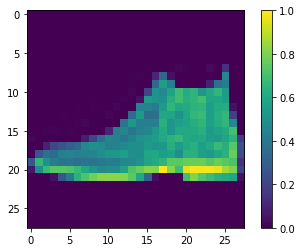

In [20]:
plt.figure()
plt.imshow(test_images[0]) # let's look at the 1nd image of our testing dataset
plt.colorbar()
plt.grid(False)
plt.show()

In [21]:
# to see if the class is indeed ankle boot:
print(class_names[np.argmax(predictions[0])])

Ankle boot


We can test any of the predictions with the testing images by changing the values in ```print(class_names[np.argmax(predictions[])])``` and in ```plt.imshow(test_images[0])```

### Playing around with the model and making predictions

Below is a script that I stole from the TesnorFlow 2.0 course. This script uses our model to make predictions on any entry/image that we want. The user just needs to type a number (0-999), the script will find the image that corresponds to that number in the **test dataset**, it will make a prediction from the model that we created and it will show us what that image actually was vs what it was predicted to be:

Pick a number: 10


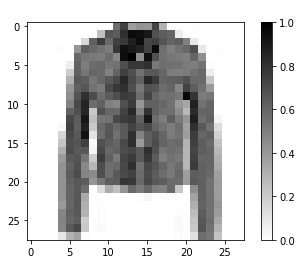

In [25]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                   'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    plt.title("Excpected: " + label)
    plt.xlabel("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()


def get_number():
    
    while True:
        num = input("Pick a number: ")
        if num.isdigit():
            num = int(num)
            if 0 <= num <= 1000:
                return int(num)
            else:
                print("Try again...")
    
num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)